In [6]:
print(5)


5


    Uid  Username  Verification status  Net Engagement  Account Reached  \
0     1    user_1                 True        4.674415         5.096488   
1     2    user_2                 True        3.702787         5.339314   
2     3    user_3                 True        7.364944         6.336418   
3     4    user_4                 True        8.484998         6.580938   
4     5    user_5                 True        6.239317         5.350574   
..  ...       ...                  ...             ...              ...   
95   96   user_96                 True        3.950311         5.057779   
96   97   user_97                 True        3.897626         5.488075   
97   98   user_98                 True        3.443586         5.405906   
98   99   user_99                 True        4.805616         5.141328   
99  100  user_100                False       -9.047314         0.167573   

      Report  Net Profile Credit  
0   0.000000            9.770903  
1   0.000000            9.042

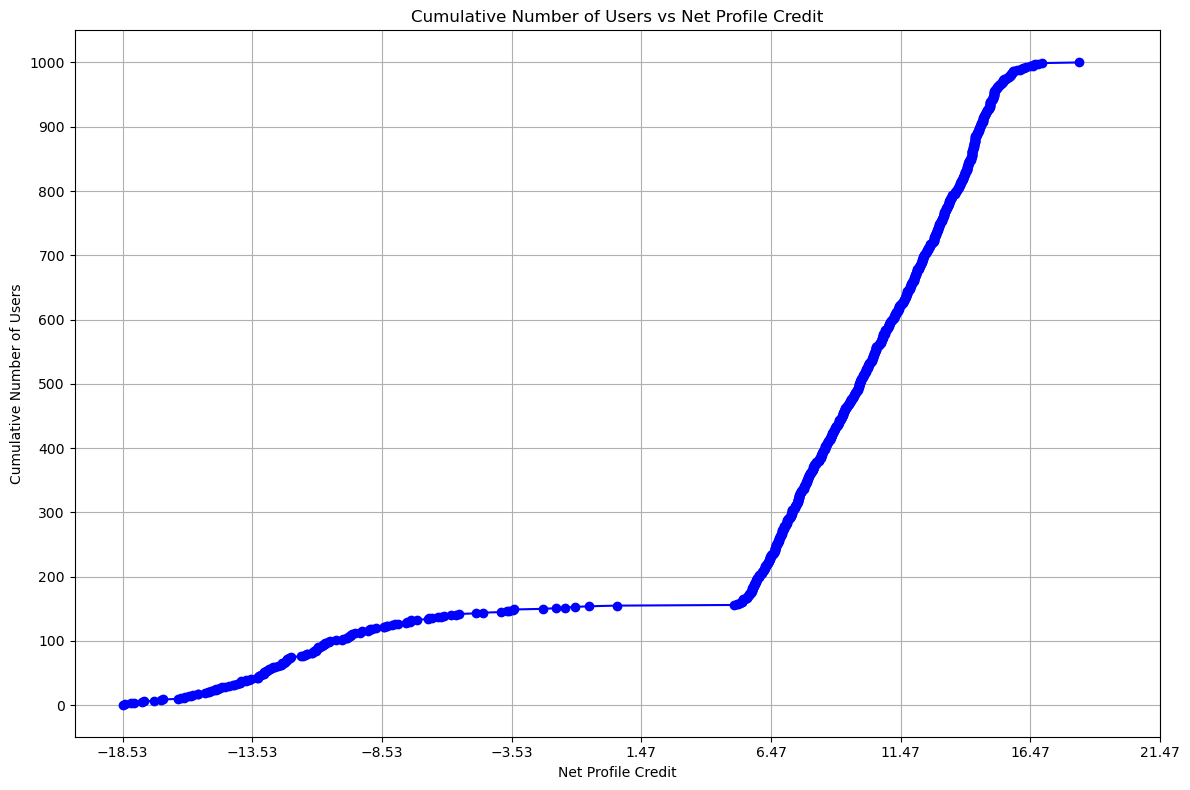

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of users
num_users = 1000

# Function to generate unique usernames
def generate_usernames(size):
    return [f'user_{i}' for i in range(1, size + 1)]

# Function to generate exponentially distributed values within range
def exponential_distribution_within_range(size, low, high):
    values = np.random.exponential(scale=1, size=size)
    values = low + (high - low) * (values / np.max(values))  # Scale to fit within [low, high]
    return np.clip(values, low, high)

# Generate the initial DataFrame
df = pd.DataFrame({
    'Uid': range(1, num_users + 1),
    'Username': generate_usernames(num_users),
    'Verification status': np.random.choice([True, False], size=num_users, p=[0.85, 0.15]),
    'Net Engagement': exponential_distribution_within_range(num_users, -10, 10),
    'Account Reached': exponential_distribution_within_range(num_users, 0, 10),
    'Report': np.zeros(num_users),
    'Net Profile Credit': 0
})

# Set conditions based on verification status
verified_indices = df[df['Verification status'] == True].index
unverified_indices = df[df['Verification status'] == False].index

# Adjust Net Engagement for verified accounts to have no negative values
df.loc[verified_indices, 'Net Engagement'] = np.random.uniform(0, 10, size=len(verified_indices))

# Adjust Report for unverified accounts to have random values between -10 and 0
df.loc[unverified_indices, 'Report'] = np.random.uniform(-10, 0, size=len(unverified_indices))

# Adjust Account Reached to ensure unverified accounts have the least values
df.loc[unverified_indices, 'Account Reached'] = exponential_distribution_within_range(len(unverified_indices), 0, 5)
df.loc[verified_indices, 'Account Reached'] = exponential_distribution_within_range(len(verified_indices), 5, 10)

# Calculate Net Profile Credit
df['Net Profile Credit'] = df['Net Engagement'] + df['Account Reached'] + df['Report']

# Display the DataFrame
print(df.head(100))

# Sort DataFrame by Net Profile Credit
df_sorted = df.sort_values(by='Net Profile Credit')

# Compute cumulative count
total_value_counts = df_sorted['Net Profile Credit'].value_counts().sort_index()
cumulative_counts = total_value_counts.cumsum()

# Plot the Line Graph
plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
plt.show()


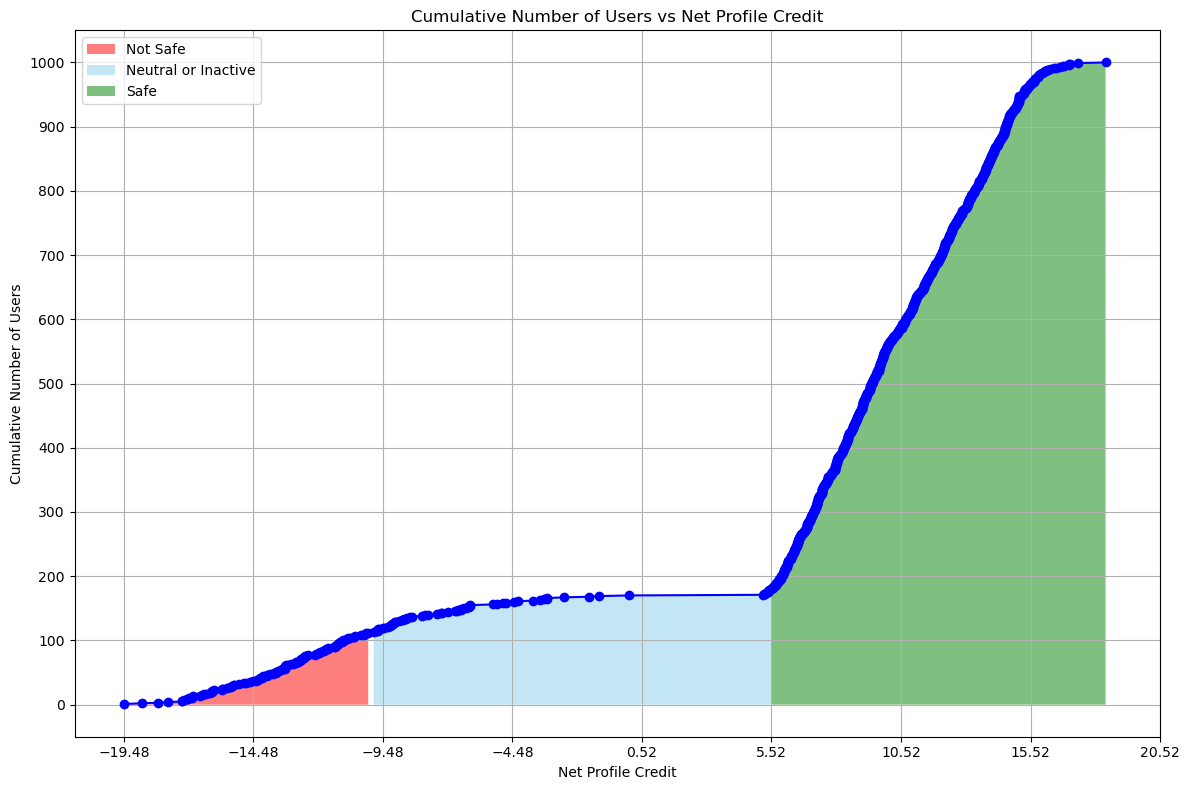

In [130]:
# Plot the Line Graph with labelled areas
plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')

# Fill areas
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index < -10), 
                 facecolor='red', alpha=0.5, label='Not Safe')
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index >= -10) & (cumulative_counts.index <= 5.52), 
                 facecolor='skyblue', alpha=0.5, label='Neutral or Inactive')
plt.fill_between(cumulative_counts.index, 0, cumulative_counts.values, where=(cumulative_counts.index > 5.52), 
                 facecolor='green', alpha=0.5, label='Safe')

# Labels and title for graphs
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.legend(loc='upper left')

# Grid and ticks

plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
# Show plot
plt.show()

In [170]:
# Get the usernames of accounts with Net Profile Credit < -10
unsafe_accounts = df[df['Net Profile Credit'] < -10]['Username']

# Print the usernames
print("Usernames of accounts with Net Profile Credit < -10:")
print(unsafe_accounts.tolist())

Usernames of accounts with Net Profile Credit < -10:
['user_14', 'user_24', 'user_32', 'user_36', 'user_66', 'user_70', 'user_71', 'user_77', 'user_89', 'user_90', 'user_100', 'user_105', 'user_107', 'user_115', 'user_127', 'user_131', 'user_145', 'user_150', 'user_158', 'user_165', 'user_190', 'user_192', 'user_212', 'user_224', 'user_225', 'user_228', 'user_245', 'user_255', 'user_260', 'user_261', 'user_264', 'user_275', 'user_277', 'user_278', 'user_296', 'user_305', 'user_311', 'user_313', 'user_315', 'user_344', 'user_352', 'user_353', 'user_374', 'user_403', 'user_416', 'user_418', 'user_430', 'user_435', 'user_436', 'user_449', 'user_451', 'user_478', 'user_483', 'user_497', 'user_499', 'user_503', 'user_509', 'user_510', 'user_520', 'user_521', 'user_538', 'user_578', 'user_582', 'user_619', 'user_631', 'user_644', 'user_663', 'user_671', 'user_685', 'user_688', 'user_692', 'user_704', 'user_705', 'user_724', 'user_726', 'user_731', 'user_746', 'user_750', 'user_751', 'user_75

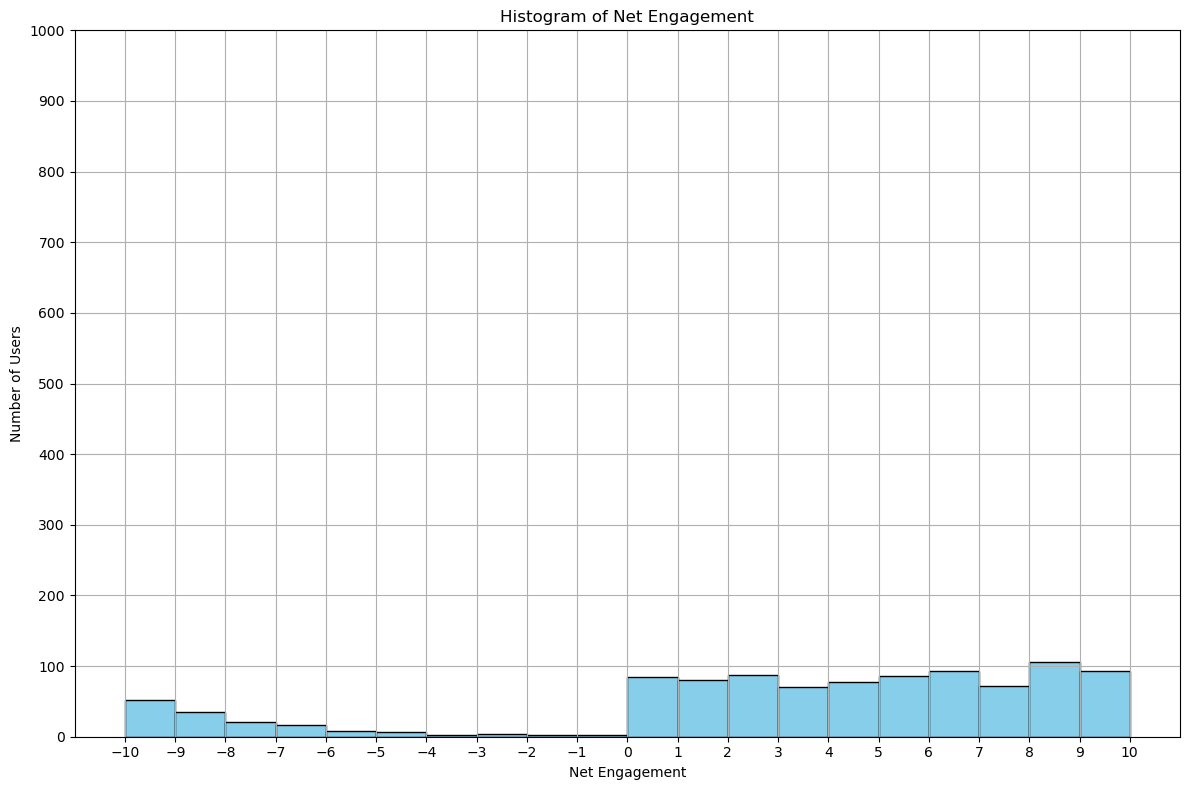

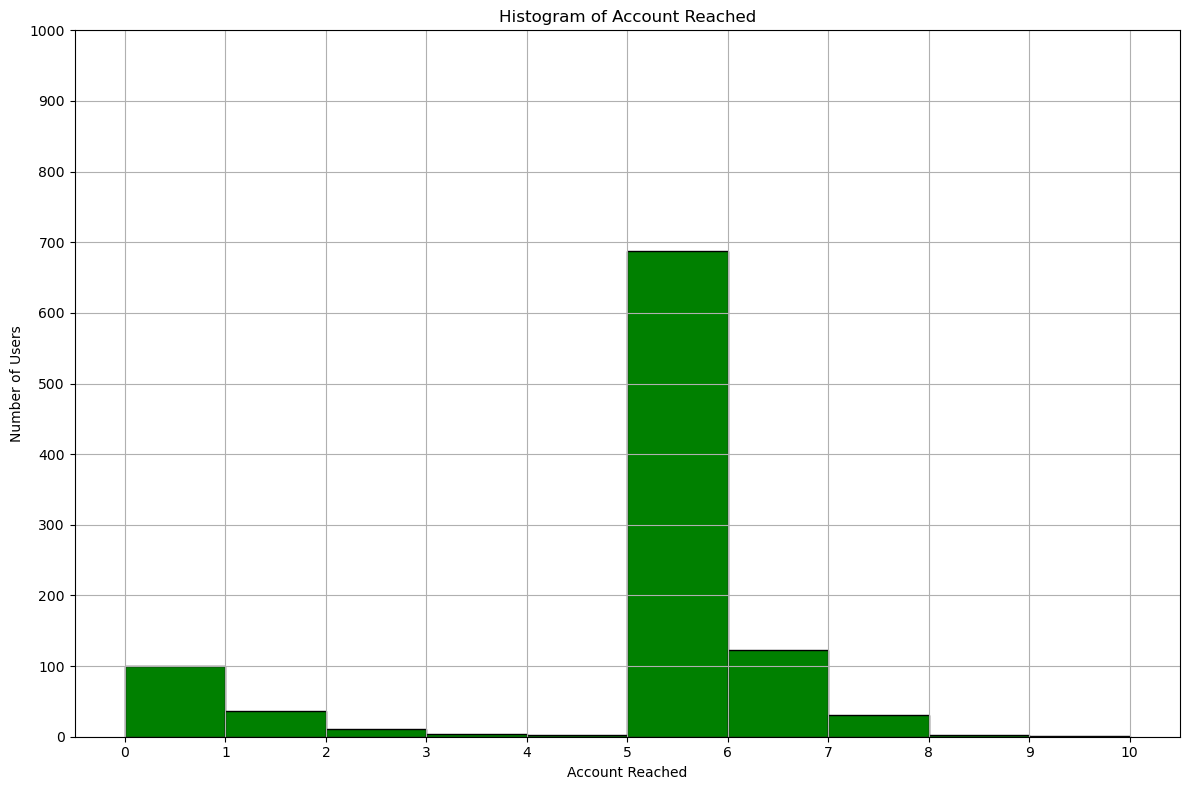

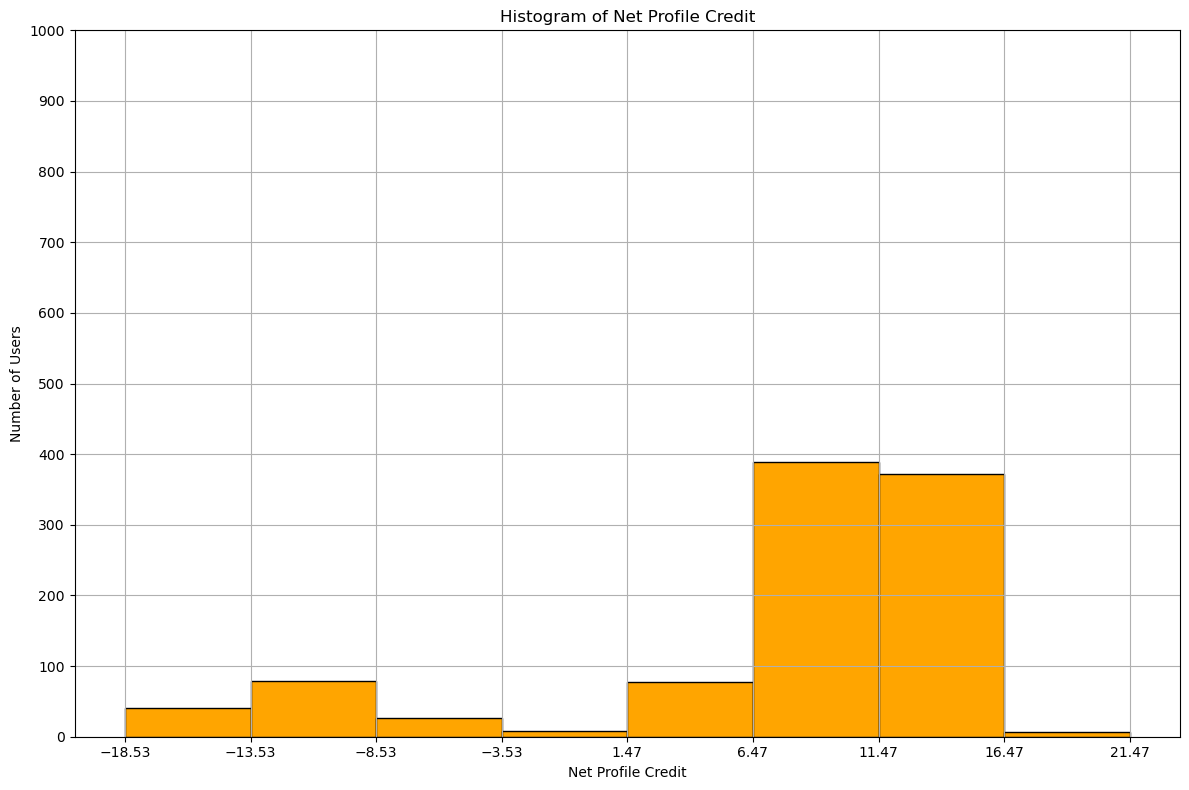

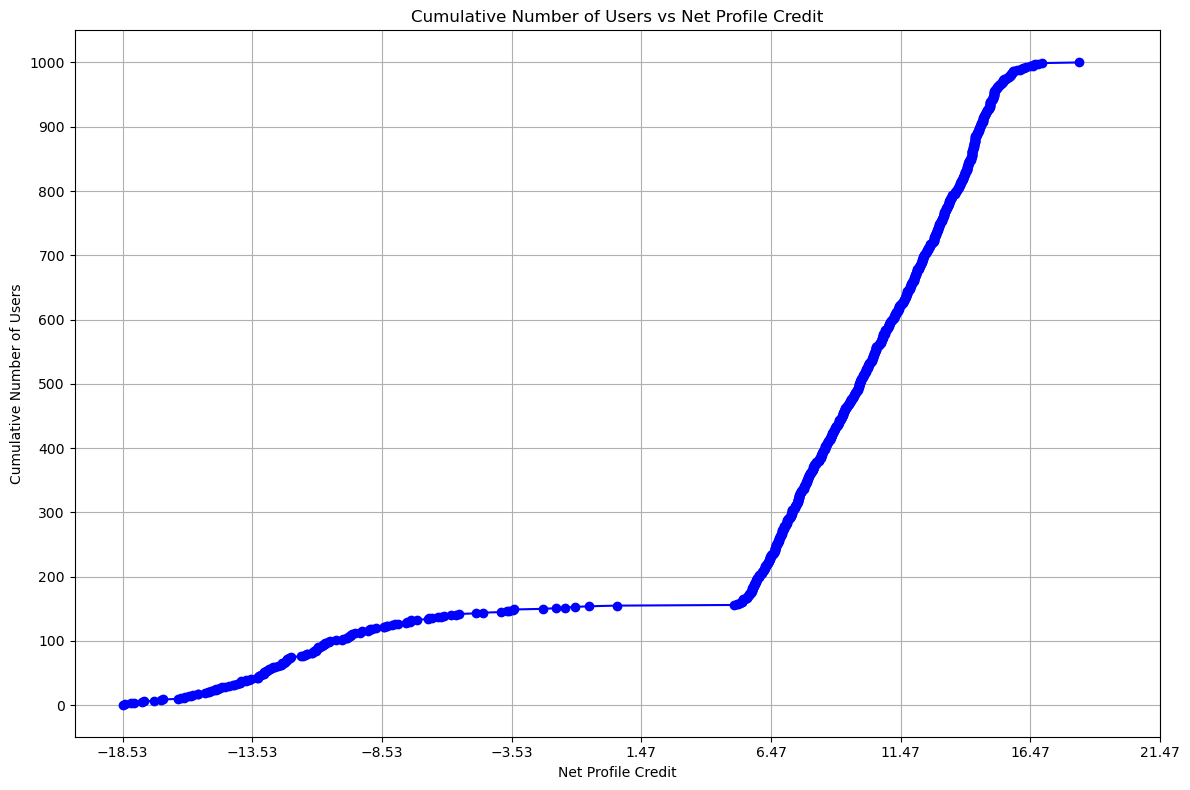

In [172]:
# Plotting graphs for Net Engagement, Account Reached, and Net Profile Credit

# 1. Net Engagement
plt.figure(figsize=(12, 8))
plt.hist(df['Net Engagement'], bins=np.arange(-10, 11, 1), edgecolor='black', color='skyblue')
plt.title('Histogram of Net Engagement')
plt.xlabel('Net Engagement')
plt.ylabel('Number of Users')
plt.xticks(np.arange(-10, 11, 1))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Account Reached
plt.figure(figsize=(12, 8))
plt.hist(df['Account Reached'], bins=np.arange(0, 11, 1), edgecolor='black', color='green')
plt.title('Histogram of Account Reached')
plt.xlabel('Account Reached')
plt.ylabel('Number of Users')
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Net Profile Credit
plt.figure(figsize=(12, 8))
plt.hist(df['Net Profile Credit'], bins=np.arange(df['Net Profile Credit'].min(), df['Net Profile Credit'].max() + 5, 5), edgecolor='black', color='orange')
plt.title('Histogram of Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Number of Users')
plt.xticks(np.arange(df['Net Profile Credit'].min(), df['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the Line Graph for Cumulative Number of Users vs Net Profile Credit
df_sorted = df.sort_values(by='Net Profile Credit')
total_value_counts = df_sorted['Net Profile Credit'].value_counts().sort_index()
cumulative_counts = total_value_counts.cumsum()

plt.figure(figsize=(12, 8))
plt.plot(cumulative_counts.index, cumulative_counts.values, marker='o', linestyle='-', color='b')
plt.title('Cumulative Number of Users vs Net Profile Credit')
plt.xlabel('Net Profile Credit')
plt.ylabel('Cumulative Number of Users')
plt.grid(True)
plt.xticks(np.arange(df_sorted['Net Profile Credit'].min(), df_sorted['Net Profile Credit'].max() + 5, 5))
plt.yticks(np.arange(0, num_users + 100, 100))
plt.tight_layout()
plt.show()